In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import graphviz

### Portfolio assignment 3
15 min: Perform a univariate analysis on all the categorical data of the penguins dataset. Commit the notebook to your portfolio when you're finished.
Optional: Start working on portfolio assignment 4 

In [2]:
penguins = sns.load_dataset("penguins")

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<AxesSubplot:>

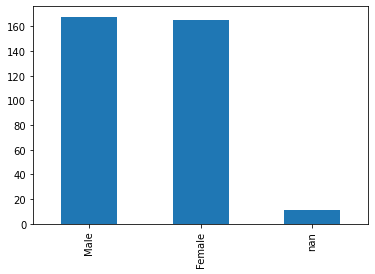

In [3]:
penguins['sex'].value_counts(dropna=False).plot(kind='bar')

<AxesSubplot:>

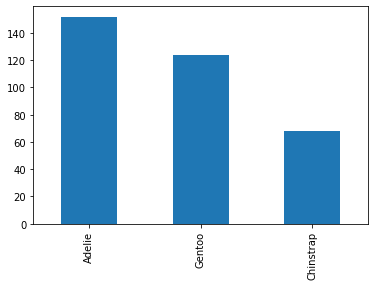

In [4]:
penguins['species'].value_counts(dropna=False).plot(kind='bar')

### Portfolio assignment 4
15 min: Look online for a datset that you personally find interesting to explore. It can be about any topic that you find interesting: sports, games, software development, etc. Commit the dataset to your portfolio. You will be analysing the dataset in future portfolio assignments.

Required characteristics of the dataset:
- Must be in a tabular format: Contains rows and columns
- Contains at least 100 rows
- Contains at least 2 columns with categorical data and at least 2 columns with numerical data
- Is less than 200 MB

![](https://i.imgur.com/0v1CGNV.png)

In [5]:
lolChampions = pd.read_csv('Datasets/LoL-Champions.csv', sep=',')

### Portfolio assignment 5
20 min: 
- Download lifeExpectancyAtBirth.csv from Onderwijsmateriaal/Datasets on Blackboard.
- Move the file to the same folder as the Notebook that you will be working in.
- Load the dataset in your Notebook with the following code: lifeExpectancy = pd.read_csv('Datasets/lifeExpectancyAtBirth.csv', sep=',')
- Look at the dataset with the .head() function.
- Filter the dataframe: We only want the life expectancy data about 2019 and 'Both sexes'
- Use this dataframe to perform a univariate analysis on the life expectancy in 2019.

Commit the notebook and dataset to your portfolio when you're finished.

![](https://i.imgur.com/0v1CGNV.png)

In [6]:
lifeExpectancy = pd.read_csv('Datasets/lifeExpectancyAtBirth.csv', sep=',')

lifeExpectancy.head()


,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21
1,Afghanistan,2019,Life expectancy at birth (years),Male,63.29
2,Afghanistan,2019,Life expectancy at birth (years),Female,63.16
3,Afghanistan,2015,Life expectancy at birth (years),Both sexes,61.65
4,Afghanistan,2015,Life expectancy at birth (years),Male,61.04


In [7]:
filteredLifeExpectancy = lifeExpectancy[(lifeExpectancy['Dim1'] == 'Both sexes') & (lifeExpectancy['Period'] == 2019)]
filteredLifeExpectancy.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21
12,Albania,2019,Life expectancy at birth (years),Both sexes,78.00
24,Algeria,2019,Life expectancy at birth (years),Both sexes,77.13
36,Angola,2019,Life expectancy at birth (years),Both sexes,63.06
48,Antigua and Barbuda,2019,Life expectancy at birth (years),Both sexes,76.45


In [8]:
filteredLifeExpectancy['First Tooltip'].mean()

72.54049180327873

In [9]:
filteredLifeExpectancy['First Tooltip'].median()

73.74

In [10]:
filteredLifeExpectancy['First Tooltip'].std()

7.129956404370866

In [11]:
filteredLifeExpectancy['First Tooltip'].max()

84.26

In [12]:
filteredLifeExpectancy['First Tooltip'].min()

50.75

<AxesSubplot:>

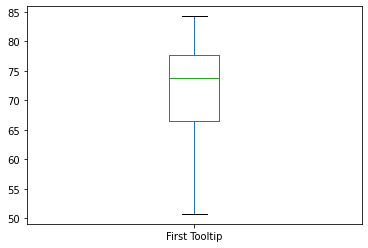

In [13]:
filteredLifeExpectancy['First Tooltip'].plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

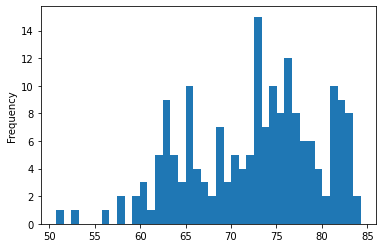

In [14]:
filteredLifeExpectancy['First Tooltip'].plot(kind='hist', bins=40)

In [15]:
filteredLifeExpectancy.sort_values(by='First Tooltip')

,Location,Period,Indicator,Dim1,First Tooltip
1117,Lesotho,2019,Life expectancy at birth (years),Both sexes,50.75
373,Central African Republic,2019,Life expectancy at birth (years),Both sexes,53.10
1801,Somalia,2019,Life expectancy at birth (years),Both sexes,56.47
661,Eswatini,2019,Life expectancy at birth (years),Both sexes,57.73
1333,Mozambique,2019,Life expectancy at birth (years),Both sexes,58.14
...,...,...,...,...,...
1837,Spain,2019,Life expectancy at birth (years),Both sexes,83.22
1753,Singapore,2019,Life expectancy at birth (years),Both sexes,83.22
1573,Republic of Korea,2019,Life expectancy at birth (years),Both sexes,83.30
1897,Switzerland,2019,Life expectancy at birth (years),Both sexes,83.45


### Portfolio assignment 6
60 min: Perform a univariate analysis on at least 2 columns with categorical data and on at least 2 columns with numerical data in the dataset that you chose in portfolio assignment 4. Commit the Notebook to your portfolio when you're finished.

![](https://i.imgur.com/0v1CGNV.png)

In [16]:
lolChampions.head()

,Id,Name,Class,Style,Difficulty,DamageType,Damage,Sturdiness,Crowd-Control,Mobility,Functionality
0,1,Aatrox,Warrior,3,2,P,3,3,2,2,2.0
1,2,Ahri,Mage,10,2,M,3,1,2,3,1.0
2,3,Akali,Assasin,7,2,PM,3,1,1,3,1.0
3,4,Alistar,Tank-Support,7,1,M,1,3,3,1,2.0
4,5,Amumu,Tank,9,1,M,2,3,3,1,1.0


In [17]:
filteredClass = lolChampions[lolChampions['Class'] == 'Mage-Marksman']

filteredClass.head()

,Id,Name,Class,Style,Difficulty,DamageType,Damage,Sturdiness,Crowd-Control,Mobility,Functionality
26,27,Ezreal,Mage-Marksman,6,2,PM,3,1,1,2,1.0


<AxesSubplot:>

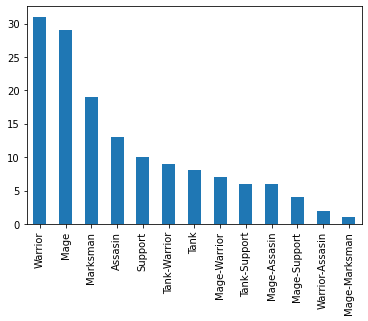

In [18]:
#penguins['sex'].value_counts(dropna=False).plot(kind='bar')

lolChampions['Class'].value_counts(dropna=False).plot(kind='bar')

<AxesSubplot:>

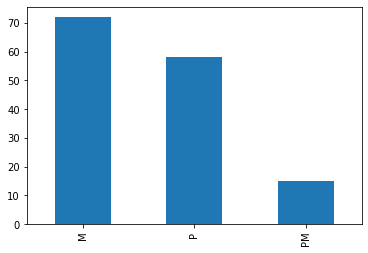

In [19]:
lolChampions['DamageType'].value_counts(dropna=False).plot(kind='bar')

In [20]:
lolChampions['Difficulty'].mean()

1.8827586206896552

In [21]:
lolChampions['Difficulty'].median()

2.0

In [22]:
lolChampions['Difficulty'].std()

0.7022132498578061

In [23]:
lolChampions['Difficulty'].max()

3

In [24]:
lolChampions['Difficulty'].min()

1

<AxesSubplot:ylabel='Frequency'>

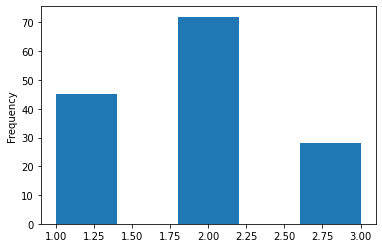

In [25]:
lolChampions['Difficulty'].plot(kind='hist', bins=5)

<AxesSubplot:>

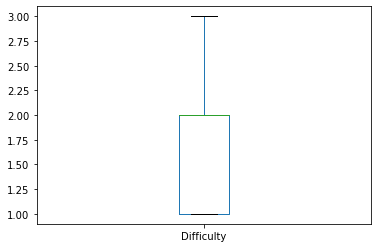

In [26]:
lolChampions['Difficulty'].plot(kind='box')

In [27]:
lolChampions['Style'].max()

10

In [28]:
lolChampions['Style'].min()

1

In [29]:
lolChampions['Style'].mean()

6.544827586206897

In [30]:
lolChampions['Style'].median()

7.0

In [31]:
lolChampions['Style'].std()

2.8061918401417545

<AxesSubplot:>

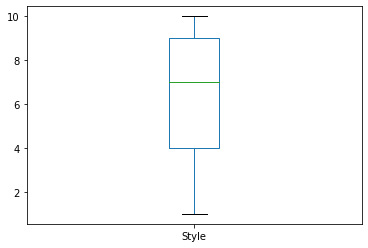

In [32]:
lolChampions['Style'].plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

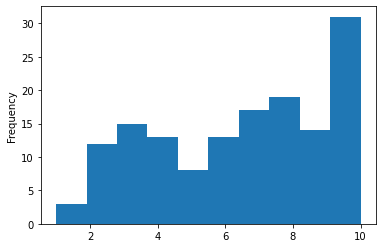

In [33]:
lolChampions['Style'].plot(kind='hist')

In [34]:
noIdLolChampions = lolChampions

del noIdLolChampions['Id']

noIdLolChampions.head()

,Name,Class,Style,Difficulty,DamageType,Damage,Sturdiness,Crowd-Control,Mobility,Functionality
0,Aatrox,Warrior,3,2,P,3,3,2,2,2.0
1,Ahri,Mage,10,2,M,3,1,2,3,1.0
2,Akali,Assasin,7,2,PM,3,1,1,3,1.0
3,Alistar,Tank-Support,7,1,M,1,3,3,1,2.0
4,Amumu,Tank,9,1,M,2,3,3,1,1.0


<AxesSubplot:xlabel='Name'>

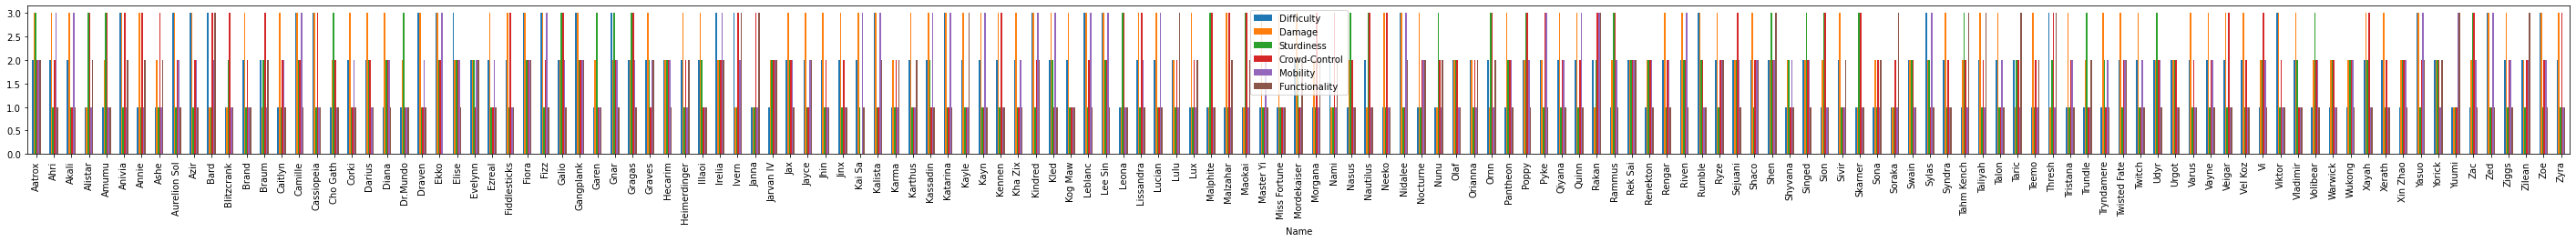

In [35]:
x = noIdLolChampions['Name']

noIdLolChampions.sort_index().drop(['Style'], axis=1).plot(kind='bar', x='Name', figsize=(50,3))

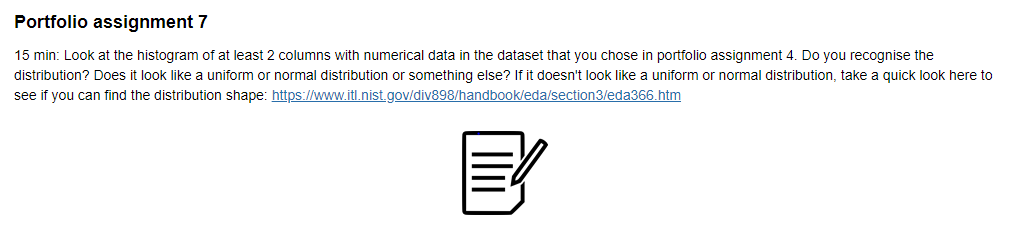

<AxesSubplot:ylabel='Frequency'>

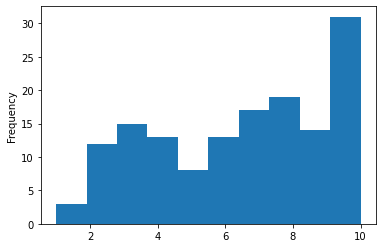

In [36]:
lolChampions['Style'].plot(kind='hist', bins=10)

<AxesSubplot:ylabel='Frequency'>

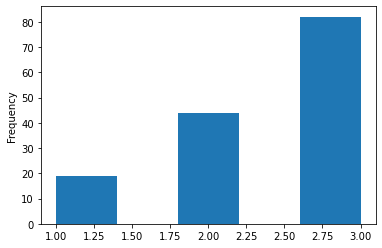

In [37]:
lolChampions['Damage'].plot(kind='hist', bins=5)

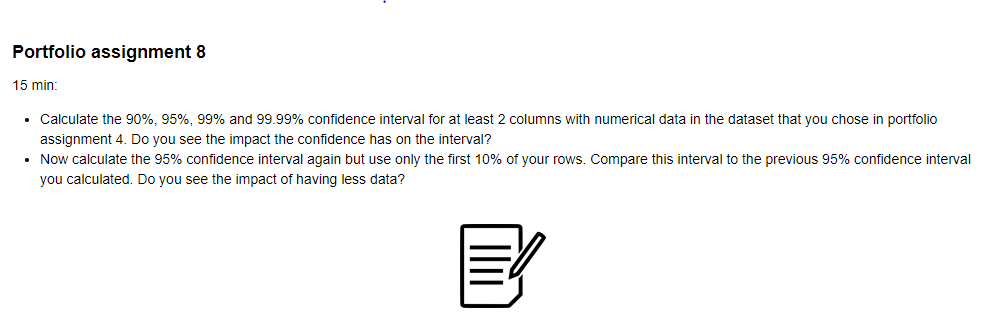

In [38]:
confidence = 0.90
st.t.interval(confidence, len(lolChampions)-1, loc=lolChampions['Damage'].mean(), scale=st.sem(lolChampions['Damage']))

(2.3361755612204376, 2.532789956020942)

In [39]:
confidence = 0.95
st.t.interval(confidence, len(lolChampions)-1, loc=lolChampions['Damage'].mean(), scale=st.sem(lolChampions['Damage']))

(2.317109720327273, 2.551855796914107)

In [40]:
confidence = 0.99
st.t.interval(confidence, len(lolChampions)-1, loc=lolChampions['Damage'].mean(), scale=st.sem(lolChampions['Damage']))

(2.279471781932075, 2.5894937353093046)

In [41]:
confidence = 0.9999
st.t.interval(confidence, len(lolChampions)-1, loc=lolChampions['Damage'].mean(), scale=st.sem(lolChampions['Damage']))

(2.1968146755119053, 2.6721508417294744)

In [42]:
confidence = 0.90
st.t.interval(confidence, len(lolChampions)-1, loc=lolChampions['Style'].mean(), scale=st.sem(lolChampions['Style']))

(6.159026330180822, 6.930628842232972)

In [43]:
confidence = 0.95
st.t.interval(confidence, len(lolChampions)-1, loc=lolChampions['Style'].mean(), scale=st.sem(lolChampions['Style']))

(6.0842034732761725, 7.0054516991376214)

In [44]:
confidence = 0.99
st.t.interval(confidence, len(lolChampions)-1, loc=lolChampions['Style'].mean(), scale=st.sem(lolChampions['Style']))

(5.936495428584603, 7.153159743829191)

In [45]:
confidence = 0.9999
st.t.interval(confidence, len(lolChampions)-1, loc=lolChampions['Style'].mean(), scale=st.sem(lolChampions['Style']))

(5.612112104477139, 7.477543067936655)

In [46]:
lolChampions10 = lolChampions.head(10)
lolChampions10

,Name,Class,Style,Difficulty,DamageType,Damage,Sturdiness,Crowd-Control,Mobility,Functionality
0,Aatrox,Warrior,3,2,P,3,3,2,2,2.0
1,Ahri,Mage,10,2,M,3,1,2,3,1.0
2,Akali,Assasin,7,2,PM,3,1,1,3,1.0
3,Alistar,Tank-Support,7,1,M,1,3,3,1,2.0
4,Amumu,Tank,9,1,M,2,3,3,1,1.0
5,Anivia,Mage,10,3,M,3,1,3,1,2.0
6,Annie,Mage,10,1,M,3,1,3,1,2.0
7,Ashe,Marksman,3,1,P,2,1,3,1,2.0
8,Aurelion Sol,Mage,10,3,M,3,1,2,2,1.0
9,Azir,Mage,5,3,M,3,1,2,2,1.0


In [47]:
confidence = 0.95
st.t.interval(confidence, len(lolChampions10)-1, loc=lolChampions10['Damage'].mean(), scale=st.sem(lolChampions10['Damage']))

(2.0998182316248797, 3.1001817683751205)

### Portfolio assignment 9
25 min: Perform a bivariate analysis on the columns with numerical data in the penguins dataset.
- Use corr() on the DataFrame to calculate all the correlations. Use the code example above to show the correlation table with colors.
- Look at the corrrelations. Do they match your expectations?
- Show a scatter plot for
 - The strongest positive correlation
 - The strongest negative correlation
 - The weakest correlation

In [48]:
penguins = sns.load_dataset("penguins")

In [49]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [50]:
penguins.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [51]:
penguinsCorr = penguins.corr()
penguinsCorr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.00,-0.24,0.66,0.60
bill_depth_mm,-0.24,1.00,-0.58,-0.47
flipper_length_mm,0.66,-0.58,1.00,0.87
body_mass_g,0.60,-0.47,0.87,1.00


The strongest positive

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

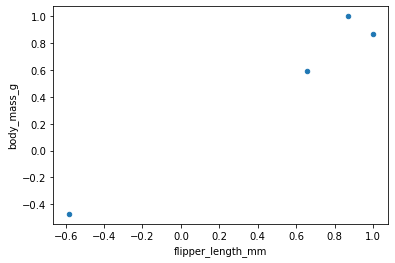

In [52]:
penguinsCorr.plot(kind='scatter', x='flipper_length_mm', y='body_mass_g')

The strongest negative

<AxesSubplot:xlabel='bill_depth_mm', ylabel='flipper_length_mm'>

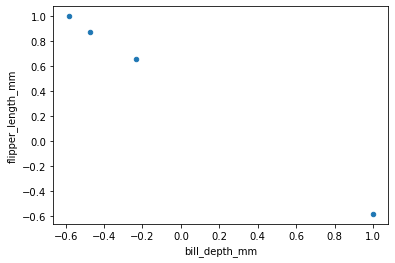

In [53]:
penguinsCorr.plot(kind='scatter', x='bill_depth_mm',y='flipper_length_mm')

The weakest

<AxesSubplot:xlabel='bill_depth_mm', ylabel='bill_length_mm'>

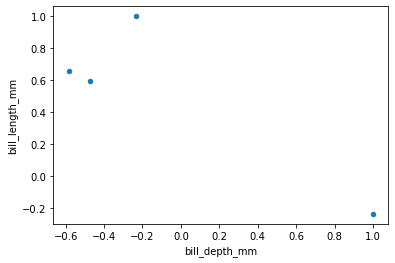

In [54]:
penguinsCorr.plot(kind='scatter', x='bill_depth_mm', y='bill_length_mm')

### Portfolio assignment 10
15 min: Perform a bivariate analysis (Pearson correlation and scatter plot) on at least 1 combination of 2 columns with numeric data in the dataset that you chose in portfolio assignment 4. Does the correlation and scatter plot match your expectations? Add your answer to your notebook. Commit the Notebook to your portfolio when you're finished. 

<AxesSubplot:xlabel='Difficulty', ylabel='Damage'>

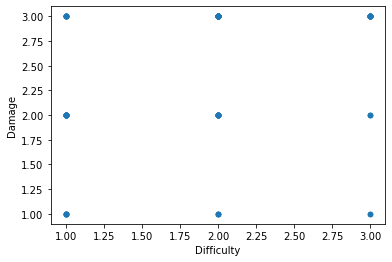

In [55]:
lolChampions.plot(kind='scatter', x="Difficulty", y='Damage')

In [56]:
lolChampions.head()

,Name,Class,Style,Difficulty,DamageType,Damage,Sturdiness,Crowd-Control,Mobility,Functionality
0,Aatrox,Warrior,3,2,P,3,3,2,2,2.0
1,Ahri,Mage,10,2,M,3,1,2,3,1.0
2,Akali,Assasin,7,2,PM,3,1,1,3,1.0
3,Alistar,Tank-Support,7,1,M,1,3,3,1,2.0
4,Amumu,Tank,9,1,M,2,3,3,1,1.0


In [57]:
lolChampions[['Difficulty', 'Damage']].corr()

,Difficulty,Damage
Difficulty,1.000000,0.309606
Damage,0.309606,1.000000


In [58]:
lolChampions.corr()

,Style,Difficulty,Damage,Sturdiness,Crowd-Control,Mobility,Functionality
Style,1.000000,0.007972,-0.156859,-0.004163,0.336989,-0.202157,0.101101
Difficulty,0.007972,1.000000,0.309606,-0.277552,-0.132959,0.402095,0.005620
Damage,-0.156859,0.309606,1.000000,-0.522833,-0.439479,0.246052,-0.363253
Sturdiness,-0.004163,-0.277552,-0.522833,1.000000,0.218118,-0.131023,-0.110488
Crowd-Control,0.336989,-0.132959,-0.439479,0.218118,1.000000,-0.327466,0.087161
Mobility,-0.202157,0.402095,0.246052,-0.131023,-0.327466,1.000000,-0.134265
Functionality,0.101101,0.005620,-0.363253,-0.110488,0.087161,-0.134265,1.000000


In [59]:
noIdCorr = noIdLolChampions.corr()
noIdCorr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,Style,Difficulty,Damage,Sturdiness,Crowd-Control,Mobility,Functionality
Style,1.00,0.01,-0.16,-0.00,0.34,-0.20,0.10
Difficulty,0.01,1.00,0.31,-0.28,-0.13,0.40,0.01
Damage,-0.16,0.31,1.00,-0.52,-0.44,0.25,-0.36
Sturdiness,-0.00,-0.28,-0.52,1.00,0.22,-0.13,-0.11
Crowd-Control,0.34,-0.13,-0.44,0.22,1.00,-0.33,0.09
Mobility,-0.20,0.40,0.25,-0.13,-0.33,1.00,-0.13
Functionality,0.10,0.01,-0.36,-0.11,0.09,-0.13,1.00


The strongest positive

<AxesSubplot:xlabel='Mobility', ylabel='Difficulty'>

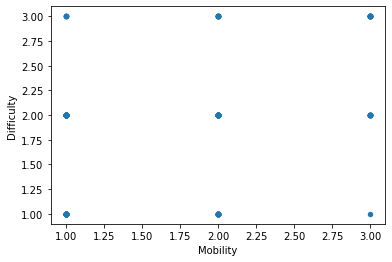

In [60]:
lolChampions.plot(kind='scatter', x='Mobility', y='Difficulty')


The strongest negative

<AxesSubplot:xlabel='Sturdiness', ylabel='Damage'>

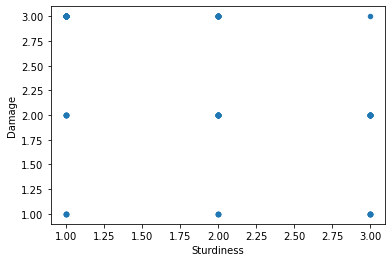

In [61]:
lolChampions.plot(kind='scatter', x='Sturdiness', y='Damage')


The weakest

<AxesSubplot:xlabel='Sturdiness', ylabel='Style'>

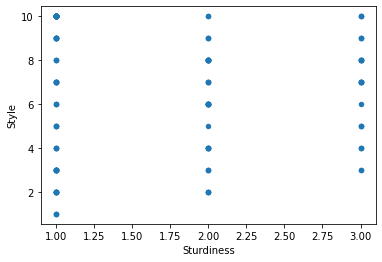

In [62]:
lolChampions.plot(kind='scatter', x='Sturdiness', y='Style')

I did expect that it would be quite well distributed, since for the game it has to have a balanced variation of Champions and not just all of the same type of Style, Sturdiness, etc...

### Portfolio assignment 11
20 min: Do a Numerical VS Categorical bivariate analysis on the penguins dataset.
- Choose one of the categorical columns: species, island or sex
- use .groupby('<columnname>').mean() too look at the means of the numerical columns. Does it look like there is a difference between categories?
- Use the seaborn barplot to plot the mean and confidence. Create this plot for each of the numerical columns (bill_length_mm	bill_depth_mm, flipper_length_mm, body_mass_g)
- For each of the plots, write a conclusion: Is there a statistically significant difference for this numerical column for each category?
- Optional: Repeat this proces for the other two categorical columns

In [63]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [64]:
penguins.groupby("island").mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
island,,,,
Biscoe,45.257485,15.874850,209.706587,4716.017964
Dream,44.167742,18.344355,193.072581,3712.903226
Torgersen,38.950980,18.429412,191.196078,3706.372549


<AxesSubplot:xlabel='island', ylabel='bill_length_mm'>

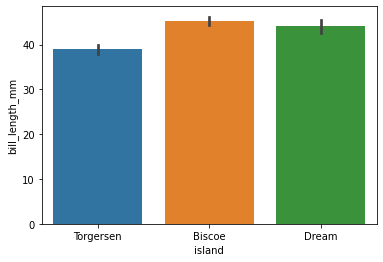

In [65]:
sns.barplot(y="bill_length_mm", x="island", data=penguins, ci=99)

<AxesSubplot:xlabel='island', ylabel='bill_depth_mm'>

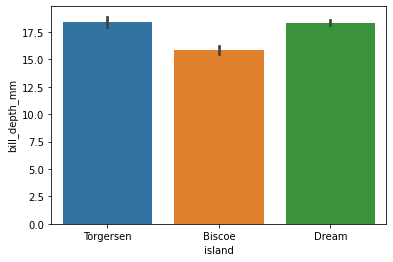

In [66]:
sns.barplot(y="bill_depth_mm", x='island', data=penguins, ci=99)

<AxesSubplot:xlabel='island', ylabel='flipper_length_mm'>

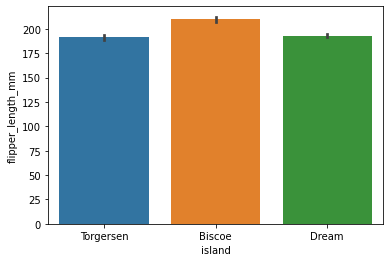

In [67]:
sns.barplot(y="flipper_length_mm", x='island', data=penguins, ci=99)

<AxesSubplot:xlabel='island', ylabel='body_mass_g'>

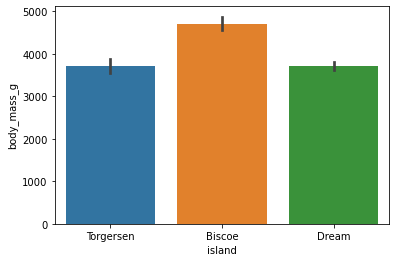

In [68]:
sns.barplot(y="body_mass_g", x='island', data=penguins, ci=99)

### Portfolio assignment 12
30 min: Perform a bivariate analysis on at least 3 combinations of a numerical column with a categorical column in the dataset that you chose in portfolio assignment 4. Use <em>.groupby('columnname').mean()</em> to calculate the means. Is there a difference between categories? Then use seaborn barplots to check if there is a statistically significant difference. 

In [69]:
lolChampions.head()

,Name,Class,Style,Difficulty,DamageType,Damage,Sturdiness,Crowd-Control,Mobility,Functionality
0,Aatrox,Warrior,3,2,P,3,3,2,2,2.0
1,Ahri,Mage,10,2,M,3,1,2,3,1.0
2,Akali,Assasin,7,2,PM,3,1,1,3,1.0
3,Alistar,Tank-Support,7,1,M,1,3,3,1,2.0
4,Amumu,Tank,9,1,M,2,3,3,1,1.0


In [70]:
lolChampions.groupby("Class").mean()

,Style,Difficulty,Damage,Sturdiness,Crowd-Control,Mobility,Functionality
Class,,,,,,,
Assasin,5.076923,2.000000,2.923077,1.076923,1.384615,2.307692,1.461538
Mage,8.931034,2.103448,2.827586,1.103448,2.310345,1.344828,1.482759
Mage-Assasin,8.666667,2.666667,2.833333,1.333333,1.666667,2.666667,1.166667
Mage-Marksman,6.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000
Mage-Support,10.000000,1.500000,2.250000,1.000000,2.500000,1.250000,2.000000
Mage-Warrior,8.142857,2.142857,2.571429,2.285714,1.857143,1.857143,1.000000
Marksman,2.631579,1.894737,2.947368,1.105263,1.526316,1.789474,1.210526
Support,8.200000,1.600000,1.300000,1.200000,2.500000,1.700000,2.400000
Tank,7.750000,1.250000,1.500000,2.875000,2.750000,1.375000,1.500000


<AxesSubplot:xlabel='Class', ylabel='Style'>

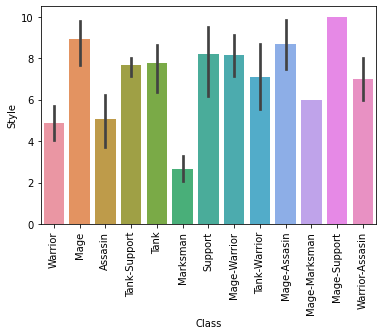

In [71]:
byClass = sns.barplot(y='Style', x='Class', data=lolChampions, ci=99)

for item in byClass.get_xticklabels():
    item.set_rotation(90)

byClass

<AxesSubplot:xlabel='Class', ylabel='Difficulty'>

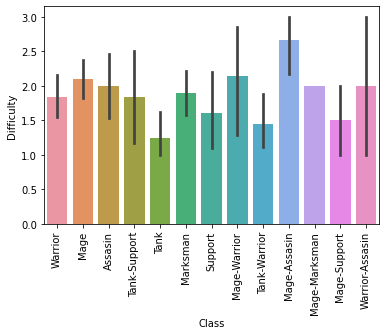

In [72]:
byClass = sns.barplot(y='Difficulty', x='Class', data=lolChampions, ci=99)

for item in byClass.get_xticklabels():
    item.set_rotation(90)

byClass

<AxesSubplot:xlabel='Class', ylabel='Damage'>

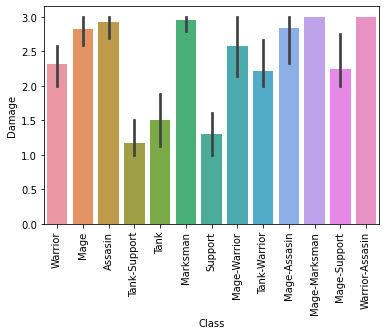

In [73]:
byClass = sns.barplot(y='Damage', x='Class', data=lolChampions, ci=99)

for item in byClass.get_xticklabels():
    item.set_rotation(90)

byClass

<AxesSubplot:xlabel='Class', ylabel='Sturdiness'>

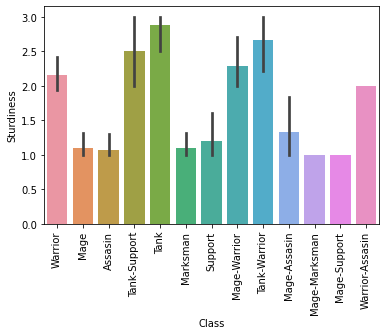

In [74]:
byClass = sns.barplot(y='Sturdiness', x='Class', data=lolChampions, ci=99)

for item in byClass.get_xticklabels():
    item.set_rotation(90)

byClass

<AxesSubplot:xlabel='Class', ylabel='Crowd-Control'>

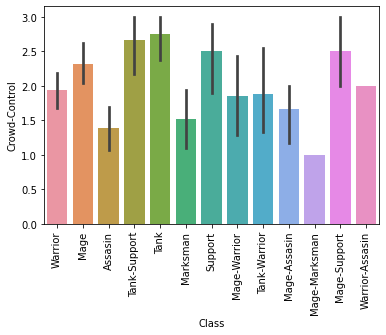

In [75]:
byClass = sns.barplot(y='Crowd-Control', x='Class', data=lolChampions, ci=99)

for item in byClass.get_xticklabels():
    item.set_rotation(90)

byClass

<AxesSubplot:xlabel='Class', ylabel='Mobility'>

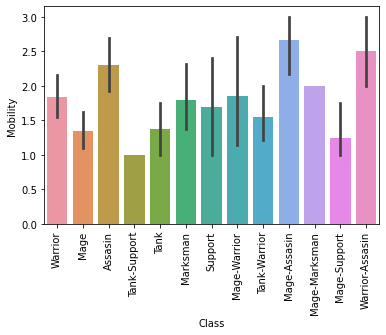

In [76]:
byClass = sns.barplot(y='Mobility', x='Class', data=lolChampions, ci=99)

for item in byClass.get_xticklabels():
    item.set_rotation(90)

byClass

<AxesSubplot:xlabel='Class', ylabel='Functionality'>

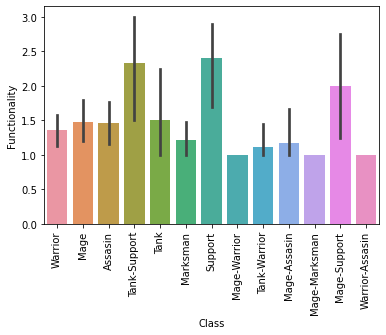

In [77]:
byClass = sns.barplot(y='Functionality', x='Class', data=lolChampions, ci=99)

for item in byClass.get_xticklabels():
    item.set_rotation(90)

byClass

### Portfolio assignment 13
10 min: Do a bivariate analysis on the penguins dataset for the following combination of columns:
- species VS sex
- island VS sex

For this bivariate analysis, at least perform the following tasks:
- Do you expect their to be a correlation between the two columns?
- Create a contigency table. Do you observe different ratios between categories here?
- Create a bar plot for this contigency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?

![](https://i.imgur.com/0v1CGNV.png)

In [78]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Do you expect their to be a correlation between the two columns?
    No I do not. I think that every species has to have some sort of equality in numbers of male and female to sustain their survivability on any island.

<AxesSubplot:>

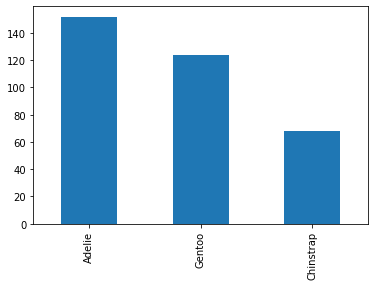

In [79]:
penguins.species.value_counts().plot(kind='bar')

<AxesSubplot:>

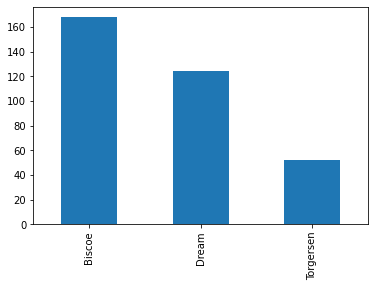

In [80]:
penguins.island.value_counts().plot(kind='bar')

<AxesSubplot:>

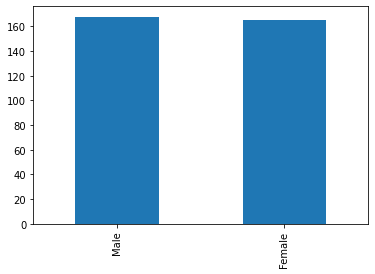

In [81]:
penguins.sex.value_counts().plot(kind='bar')

In [82]:
contingencyTable = penguins.groupby(['species','sex']).size().unstack('species',fill_value=0)
contingencyTable

species,Adelie,Chinstrap,Gentoo
sex,,,
Female,73,34,58
Male,73,34,61


Do you observe different ratios between categories here?
    No I do not. It was just as I expected; equality between male and female numbers.

<AxesSubplot:xlabel='sex'>

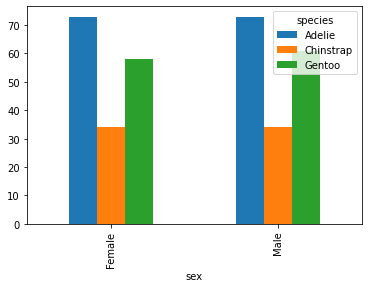

In [83]:
contingencyTable.plot(kind='bar')

Do you observe different ratios between categories here?
    Nope, still equal.

In [84]:
chi2_contingency(contingencyTable)

(0.04860717014078319,
 0.9759893689765846,
 2,
 array([[72.34234234, 33.69369369, 58.96396396],
        [73.65765766, 34.30630631, 60.03603604]]))

Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns? 97%

In [85]:
contingencyTable = penguins.groupby(['island','sex']).size().unstack('island',fill_value=0)
contingencyTable

island,Biscoe,Dream,Torgersen
sex,,,
Female,80,61,24
Male,83,62,23


Do you observe different ratios between categories here?
    No I do not. It was just as I expected; equality between male and female numbers.

<AxesSubplot:xlabel='sex'>

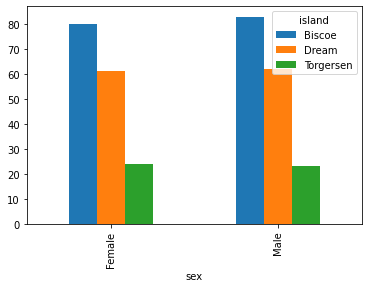

In [86]:
contingencyTable.plot(kind='bar')

Do you observe different ratios between categories here? Nope, still equal.

In [87]:
chi2_contingency(contingencyTable)

(0.05759904881286206,
 0.971611229281065,
 2,
 array([[80.76576577, 60.94594595, 23.28828829],
        [82.23423423, 62.05405405, 23.71171171]]))

Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns? 97%

### Portfolio assignment 14
Perform a bivariate analysis on at least 1 combination of 2 columns with categorical data in the dataset that you chose in portfolio assignment 4.
- Do you expect their to be a correlation between the two columns?
- Create a contigency table. Do you observe different ratios between categories here?
- Create a bar plot for this contigency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?

![](https://i.imgur.com/0v1CGNV.png)

In [88]:
lolChampions.head()

,Name,Class,Style,Difficulty,DamageType,Damage,Sturdiness,Crowd-Control,Mobility,Functionality
0,Aatrox,Warrior,3,2,P,3,3,2,2,2.0
1,Ahri,Mage,10,2,M,3,1,2,3,1.0
2,Akali,Assasin,7,2,PM,3,1,1,3,1.0
3,Alistar,Tank-Support,7,1,M,1,3,3,1,2.0
4,Amumu,Tank,9,1,M,2,3,3,1,1.0


<AxesSubplot:>

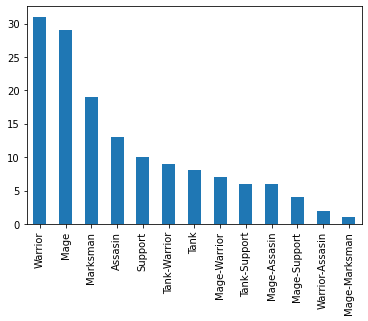

In [89]:
lolChampions.Class.value_counts().plot(kind='bar')

<AxesSubplot:>

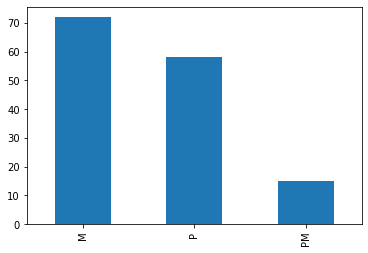

In [90]:
lolChampions.DamageType.value_counts().plot(kind='bar')

In [91]:
contingencyTable = lolChampions.groupby(['Class','DamageType']).size().unstack('Class',fill_value=0)
contingencyTable

Class,Assasin,Mage,Mage-Assasin,Mage-Marksman,Mage-Support,Mage-Warrior,Marksman,Support,Tank,Tank-Support,Tank-Warrior,Warrior,Warrior-Assasin
DamageType,,,,,,,,,,,,,
M,3,28,6,0,4,7,0,9,6,6,2,1,0
P,9,0,0,0,0,0,16,1,0,0,6,24,2
PM,1,1,0,1,0,0,3,0,2,0,1,6,0


<AxesSubplot:xlabel='DamageType'>

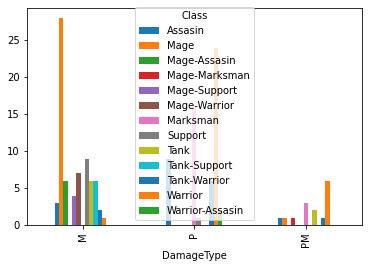

In [92]:
contingencyTable.plot(kind='bar')

In [93]:
chi2_contingency(contingencyTable)

(126.91164302171659,
 5.604496622943588e-16,
 24,
 array([[ 6.45517241, 14.4       ,  2.97931034,  0.49655172,  1.9862069 ,
          3.47586207,  9.43448276,  4.96551724,  3.97241379,  2.97931034,
          4.46896552, 15.39310345,  0.99310345],
        [ 5.2       , 11.6       ,  2.4       ,  0.4       ,  1.6       ,
          2.8       ,  7.6       ,  4.        ,  3.2       ,  2.4       ,
          3.6       , 12.4       ,  0.8       ],
        [ 1.34482759,  3.        ,  0.62068966,  0.10344828,  0.4137931 ,
          0.72413793,  1.96551724,  1.03448276,  0.82758621,  0.62068966,
          0.93103448,  3.20689655,  0.20689655]]))

Since the P value of the chi2_contingency is very very low the chance of there being a correlation between these two categorical data types.

## Portfolio assignment 15
30 min: Train a decision tree to predict the species of a penguin based on their characteristics.
- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree_classification function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

Optional: Perform the same tasks but try to predict the sex of the pinguin based on the other columns

In [94]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [95]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [96]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [97]:
penguins.isna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [98]:
values = {'bill_length_mm': penguins['bill_length_mm'].mean(), 'bill_depth_mm': penguins['bill_depth_mm'].mean(), 'flipper_length_mm': penguins['flipper_length_mm'].mean(), 'body_mass_g': penguins['body_mass_g'].mean(), 'sex': 'Unknown'}

In [99]:
df = penguins.fillna(value=values)
df_train, df_test = train_test_split(df, test_size=0.3, stratify=df['species'], random_state=42)
print(df_train.shape, df_test.shape)

(240, 7) (104, 7)


In [100]:
features= ['bill_length_mm']
dt = DecisionTreeClassifier(max_depth = 3) # Increase max_depth to see effect in the plot
dt.fit(df[features], df['species'])

DecisionTreeClassifier(max_depth=3)

In [101]:
predictions = dt.predict(df[features])
calculate_accuracy(predictions, df.species)

0.7936046511627907

In [102]:
features = ['bill_length_mm']

dt_classification = DecisionTreeClassifier(max_depth = 3)
dt_classification.fit(df_train[features], df_train['species'])

DecisionTreeClassifier(max_depth=3)

In [103]:
predictionsOnTrainset = dt_classification.predict(df_train[features])
predictionsOnTestset = dt_classification.predict(df_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, df_train.species)
accuracyTest = calculate_accuracy(predictionsOnTestset, df_test.species)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.8291666666666667
Accuracy on test set 0.7211538461538461


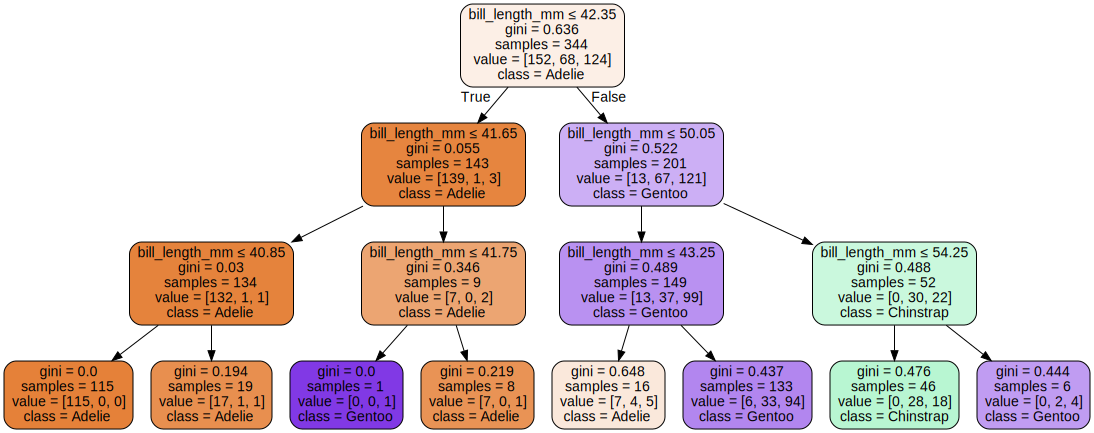

In [104]:
plot_tree_classification(dt, features, df.species.unique())

## Portfolio assignment 16
30 min: Train a decision tree to predict one of the categorical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?
    
![](https://i.imgur.com/0v1CGNV.png)

In [105]:
lolChampions.head()

,Name,Class,Style,Difficulty,DamageType,Damage,Sturdiness,Crowd-Control,Mobility,Functionality
0,Aatrox,Warrior,3,2,P,3,3,2,2,2.0
1,Ahri,Mage,10,2,M,3,1,2,3,1.0
2,Akali,Assasin,7,2,PM,3,1,1,3,1.0
3,Alistar,Tank-Support,7,1,M,1,3,3,1,2.0
4,Amumu,Tank,9,1,M,2,3,3,1,1.0


In [106]:
lolChampions.isna()

,Name,Class,Style,Difficulty,DamageType,Damage,Sturdiness,Crowd-Control,Mobility,Functionality
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
140,False,False,False,False,False,False,False,False,False,False
141,False,False,False,False,False,False,False,False,False,False
142,False,False,False,False,False,False,False,False,False,False
143,False,False,False,False,False,False,False,False,False,False


In [109]:
lolChampions.groupby("Class").size()

Class
Assasin            13
Mage               29
Mage-Assasin        6
Mage-Marksman       1
Mage-Support        4
Mage-Warrior        7
Marksman           19
Support            10
Tank                8
Tank-Support        6
Tank-Warrior        9
Warrior            31
Warrior-Assasin     2
dtype: int64

In [110]:
lc = lolChampions

index = lc[lc['Class'] == 'Mage-Marksman'].index
lc.drop(index, inplace=True)

In [111]:
lc[lc.eq('Warrior-Assasin').any(1)]

,Name,Class,Style,Difficulty,DamageType,Damage,Sturdiness,Crowd-Control,Mobility,Functionality
61,Lee Sin,Warrior-Assasin,6,3,P,3,2,2,3,1.0
84,Pantheon,Warrior-Assasin,8,1,P,3,2,2,2,1.0


In [112]:
lc = lolChampions

index = lc[lc['Class'] == 'Mage-Marksman'].index
lc.drop(index, inplace=True)

In [113]:
lc_train, lc_test = train_test_split(lc, test_size=0.3, stratify=lc['Class'], random_state=42)
print(lc_train.shape, lc_test.shape)

(100, 10) (44, 10)


In [114]:
features= ['Style', 'Damage', 'Difficulty', 'Sturdiness', 'Mobility']
dt = DecisionTreeClassifier(max_depth = 5) # Increase max_depth to see effect in the plot
dt.fit(lc[features], lc['Class'])

DecisionTreeClassifier(max_depth=5)

In [115]:
predictions = dt.predict(lc[features])
calculate_accuracy(predictions, lc.Class)

0.7430555555555556

In [116]:
dt_classification = DecisionTreeClassifier(max_depth = 5)
dt_classification.fit(lc_train[features], lc_train['Class'])

DecisionTreeClassifier(max_depth=5)

In [117]:
predictionsOnTrainset = dt_classification.predict(lc_train[features])
predictionsOnTestset = dt_classification.predict(lc_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, lc_train.Class)
accuracyTest = calculate_accuracy(predictionsOnTestset, lc_test.Class)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.73
Accuracy on test set 0.5227272727272727


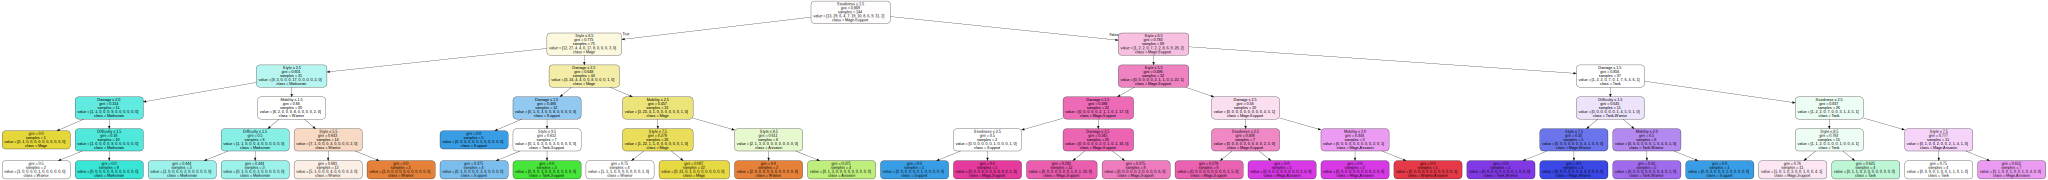

In [118]:
plot_tree_classification(dt, features, lc.Class.unique())

## Portfolio assignment 17
30 min: Train a decision tree to predict the body_mass_g of a penguin based on their characteristics.
- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the RMSE for both the train set predictions and test set predictions.
- Is the RMSE different? Did you expect this difference?
- Use the plot_tree_regression function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

In [119]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

## The same function but using a for-loop instead of a vectorized operation. 
# def calculate_rmse(predictions, actuals):
#    if(len(predictions) != len(actuals)):
#        raise Exception("The amount of predictions did not equal the amount of actuals")
#    
#    diffSquared = 0
#    
#    for prediction_i, actual_i in zip(predictions, actuals):
#        diffSquared += (prediction_i - actual_i)**2
#        
#    return (diffSquared/len(actuals))**(1/2)

In [120]:
def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [121]:
df.groupby('body_mass_g').count()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex
body_mass_g,,,,,,
2700.0,1,1,1,1,1,1
2850.0,2,2,2,2,2,2
2900.0,4,4,4,4,4,4
2925.0,1,1,1,1,1,1
2975.0,1,1,1,1,1,1
...,...,...,...,...,...,...
5850.0,3,3,3,3,3,3
5950.0,2,2,2,2,2,2
6000.0,2,2,2,2,2,2


In [122]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)
print(df_train.shape, df_test.shape)

(240, 7) (104, 7)


In [123]:
features= ['bill_length_mm']
dt = DecisionTreeRegressor(max_depth = 3) # Increase max_depth to see effect in the plot
dt.fit(df[features], df['body_mass_g'])

DecisionTreeRegressor(max_depth=3)

In [124]:
predictions = dt.predict(df[features])
calculate_rmse(predictions, df.body_mass_g)

607.8420410057074

In [125]:
dt_regression = DecisionTreeRegressor(max_depth = 3) # Increase max_depth to see effect in the plot
dt_regression.fit(df[features], df['body_mass_g'])

DecisionTreeRegressor(max_depth=3)

In [126]:
predictionsOnTrainset = dt_regression.predict(df_train[features])
predictionsOnTestset = dt_regression.predict(df_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, df_train.body_mass_g)
rmseTest = calculate_rmse(predictionsOnTestset, df_test.body_mass_g)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 598.3647243046364
RMSE on test set 629.1681574316024


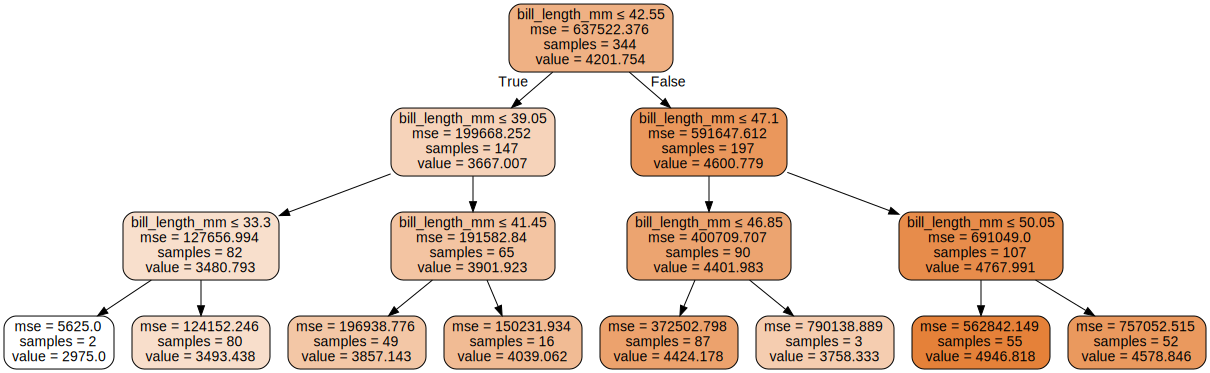

In [127]:
plot_tree_regression(dt_regression, features)

## Portfolio assignment 18
30 min: Train a decision tree to predict one of the numerical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?
    
![](https://i.imgur.com/0v1CGNV.png)

In [128]:
lolChampions.head()

,Name,Class,Style,Difficulty,DamageType,Damage,Sturdiness,Crowd-Control,Mobility,Functionality
0,Aatrox,Warrior,3,2,P,3,3,2,2,2.0
1,Ahri,Mage,10,2,M,3,1,2,3,1.0
2,Akali,Assasin,7,2,PM,3,1,1,3,1.0
3,Alistar,Tank-Support,7,1,M,1,3,3,1,2.0
4,Amumu,Tank,9,1,M,2,3,3,1,1.0


In [129]:
league_train, league_test = train_test_split(lolChampions, test_size=0.3, random_state=42)
print(league_train.shape, league_test.shape)

(100, 10) (44, 10)


In [130]:
features= ['Difficulty', 'Damage']
dt = DecisionTreeRegressor(max_depth = 3) # Increase max_depth to see effect in the plot
dt.fit(lolChampions[features], lolChampions['Style'])

DecisionTreeRegressor(max_depth=3)

In [131]:
predictions = dt.predict(lolChampions[features])
calculate_rmse(predictions, lolChampions.Style)

2.7256133720629294

In [132]:
dt_regression = DecisionTreeRegressor(max_depth = 3) # Increase max_depth to see effect in the plot
dt_regression.fit(lolChampions[features], lolChampions['Style'])

DecisionTreeRegressor(max_depth=3)

In [133]:
predictionsOnTrainset = dt_regression.predict(league_train[features])
predictionsOnTestset = dt_regression.predict(league_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, league_train.Style)
rmseTest = calculate_rmse(predictionsOnTestset, league_test.Style)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 2.6645989538829316
RMSE on test set 2.8594447572435966


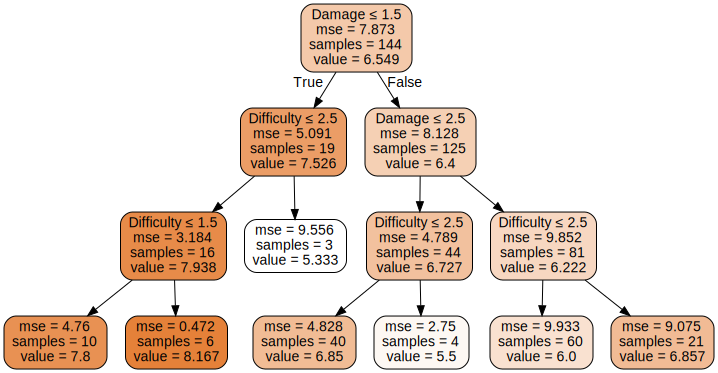

In [134]:
plot_tree_regression(dt_regression, features)

## Portfolio assignment 19
30 min: Create a cluster model on the penguins dataset.
- Use the pairplot() function on the penguins dataset. Do you visually notice any clusters? How many clusters do you think there are?
- Use the KMeans algorithm to create a cluster model. Apply this model to the dataset to create an extra column 'cluster' just like we did for the iris dataset above.  
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Calculate the Silhouette Coefficient for your clustering. Play around with the features and n_clusters to search for better results. Keep the cluster model with the highest Silhouette Coefficient.
- Use the pairplot(hue='cluster') function to observe how the model has clustered the data.
- We know the species of each penguin. Use a contingency table to reveal the relation between the cluster results and the species. Is there an exact match? Are there species which ended up in the same cluster? If so, what does it mean that they ended up in the same cluster?

In [135]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


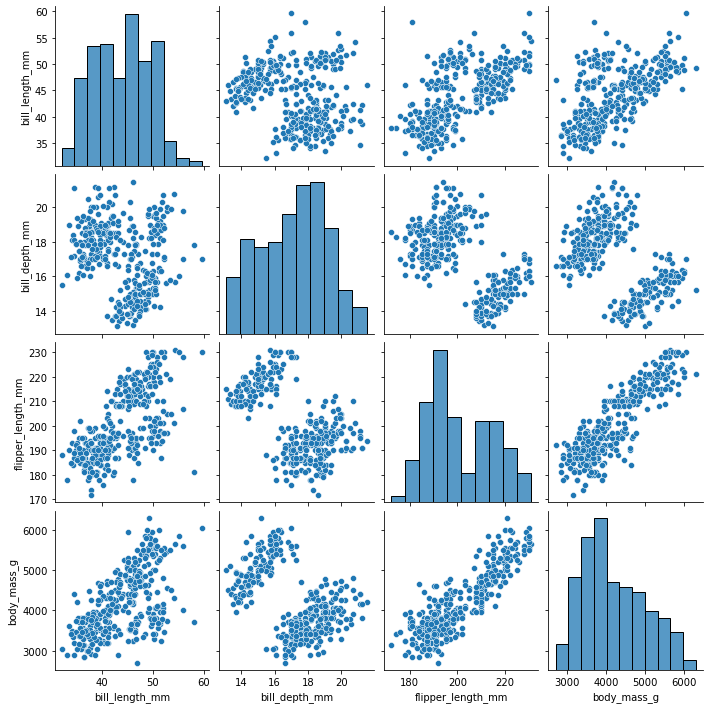

In [136]:
sns.pairplot(penguins)

In [137]:
features = ['bill_length_mm', 'bill_depth_mm', 'body_mass_g']
km = KMeans(n_clusters=2, random_state=42).fit(df[features])

In [138]:
df['cluster'] = km.predict(df[features])

In [139]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male,0
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female,0
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female,0
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Unknown,0
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female,0


In [140]:
df.cluster.value_counts()

0    211
1    133
Name: cluster, dtype: int64

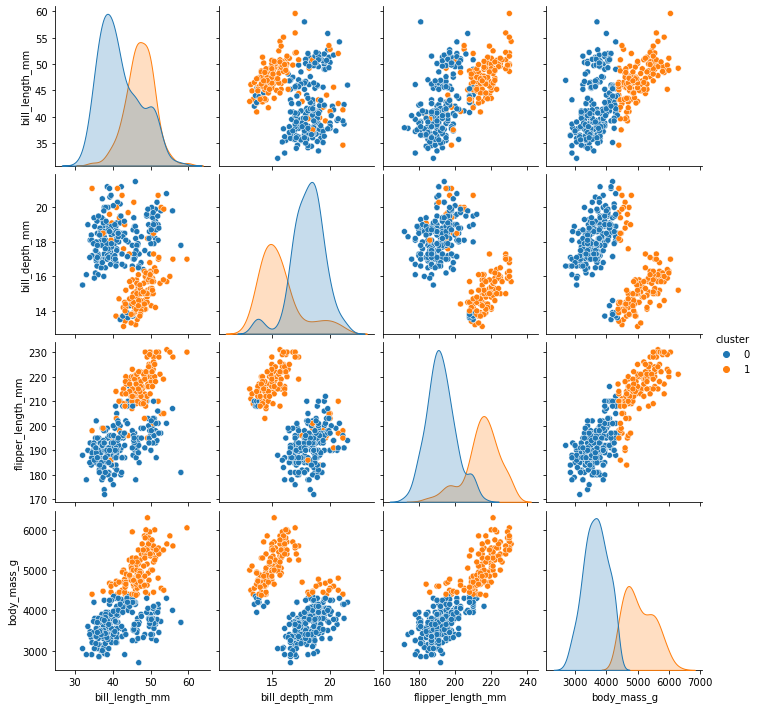

In [141]:
sns.pairplot(df, hue='cluster')

In [142]:
# You can change the features and n_clusters in the k-means above and check the impact on the Silhouette Coefficient
metrics.silhouette_score(df[features], km.labels_, metric='euclidean')

0.6273081976974083

n_clusters:

2:0.6270788983213472

3:0.578690434903177

4:0.5536647391613351

Without body mass:
2:0.6082819946375306
3:0.4774149230638612

Without flipper length:
2:0.6273081976974083
3:0.5791648797876675

Without bill depth:
2:0.6270915976159288
3:0.5787178754687238

Without bill length:
2:0.6271886040152627
3:0.5789052646558489

So without flipper length with 2 clusters has the ghighest silhouette_score
